#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Sentiment Analysis`

#### Group:
- `Miguel Matos - 20221925`
- `Nuno Leandro - 20221861`
- `Patrícia Bezerra - 20221907`
- `Rita Silva - 20221920`
- `Vasco Capão - 20221906`

#### <font color='#BFD72F'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [0. Imports](#p0)
- [1. Specific Data Preparation](#p1)
- [2. Model Implementation](#p2)
    - [2.1 VADER](#p2-1)
    - [2.2 TextBlob](#p2-2)
- [3. Models Evaluation](#p3)
    - [3.1 Vader Evaluation](#p3-1)
    - [3.2 TextBlob Evaluation](#p3-2)
- [4. Conclusion](#p4)

<font color='#BFD72F' size=8>Sentiment Analysis (Information Requirement 3312)</font> <a class="anchor" id="p0-0"></a>

"How well can we predict a restaurant’s Zomato score using the polarity of their reviews as input?"

<font color='#BFD72F' size=6>0. Imports</font> <a class="anchor" id="p0"></a>

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/miguelmatos/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from utils.functions import *
from utils.pipeline_project import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miguelmatos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/miguelmatos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/miguelmatos/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<font color='#BFD72F' size=7>1. Specific Data Preparation</font> <a class="anchor" id="p1"></a>

[Back to TOC](#toc)

In [7]:
main_df = pd.read_csv("Data/shorten_df.csv")
main_df.head()

,Unnamed: 0,Name,Review,Rating,Cuisines,preproc_reviews,msg_len,sents,nr_sents
0,0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0,"Chinese, Continental, Kebab, European, South I...",ambience good food quite good saturday lunch c...,154,"['The ambience was good, food was quite good ....",5
1,1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0,"Chinese, Continental, Kebab, European, South I...",ambience good pleasant evening service prompt ...,98,['Ambience is too good for a pleasant evening....,5
2,2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0,"Chinese, Continental, Kebab, European, South I...",must try great food great ambience thnx servic...,137,"['A must try.. great food great ambience.', 'T...",3
3,3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0,"Chinese, Continental, Kebab, European, South I...",soumen da arun great guy behavior sincerety go...,83,"['Soumen das and Arun was a great guy.', 'Only...",2
4,4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0,"Chinese, Continental, Kebab, European, South I...",food ordered kodi drumstick basket mutton biry...,108,['Food is good.we ordered Kodi drumsticks and ...,6


Next, a new DataFrame called main_sentiment will be created, containing the "Name", "Rating", and "Review" columns from the original dataset.

In [8]:
# Extract the columns, "Name", "Rating" and "Review" from the DataFrame
main_sentiment = main_df[["Name", "Rating", "Review"]]
main_sentiment.head()

,Name,Rating,Review
0,Beyond Flavours,5.0,"The ambience was good, food was quite good . h..."
1,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...
2,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...
3,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...
4,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...


In [9]:
# Add a new column, "Preproc_text" with preprocessed text based on the "Review" column
main_sentiment["Preproc_text"] = main_sentiment["Review"].apply(lambda content :\
                                                  pipeline_project.main_pipeline(str(content),
                                                                                  print_output=False,
                                                                                  no_stopwords=False,
                                                                                  lowercase=False,
                                                                                  lemmatized=False,
                                                                                  sentiment_punctuation = True,
                                                                                  no_emojis = False))
main_sentiment.head()

,Name,Rating,Review,Preproc_text
0,Beyond Flavours,5.0,"The ambience was good, food was quite good . h...",The ambience was good food was quite good had ...
1,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...,Ambience is too good for a pleasant evening Se...
2,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...,A must try great food great ambience Thnx for ...
3,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...,Soumen das and Arun was a great guy Only becau...
4,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...,Food is ordered Kodi drumsticks and basket mut...


In this code, the "Review" column is processed using a text preprocessing pipeline, and a new "Preproc_text" column is created. This new column cleans the text by handling punctuation, emojis, special characters, stopwords, and extra spaces, while preserving the original reviews.

In [10]:
sent_tokenizer = PunktSentenceTokenizer()

main_sentiment["preproc_sentences"] =\
      main_sentiment["Review"].map(lambda content : [pipeline_project.main_pipeline(sentence,
                                                                                    print_output=False,
                                                                                    no_stopwords=False,
                                                                                    lowercase=False,
                                                                                    lemmatized=False,
                                                                                    sentiment_punctuation = True,
                                                                                    no_emojis = False,
                                                                                    ) for sentence in sent_tokenizer.tokenize(content)])
main_sentiment.head()

,Name,Rating,Review,Preproc_text,preproc_sentences
0,Beyond Flavours,5.0,"The ambience was good, food was quite good . h...",The ambience was good food was quite good had ...,"[The ambience was good food was quite good, ha..."
1,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...,Ambience is too good for a pleasant evening Se...,"[Ambience is too good for a pleasant evening, ..."
2,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...,A must try great food great ambience Thnx for ...,"[A must try great food great ambience, Thnx fo..."
3,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...,Soumen das and Arun was a great guy Only becau...,"[Soumen das and Arun was a great guy, Only bec..."
4,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...,Food is ordered Kodi drumsticks and basket mut...,[Food is ordered Kodi drumsticks and basket mu...


The code above tokenizes the "Review" column into individual sentences, processes each sentence using the pipeline, and stores the results as a list in a new column called "preproc_sentences."

In [11]:
# Add a new column, "NºWords" with the number of words in each review
main_sentiment["NºWords"] = main_sentiment["Review"].apply(lambda content :\
                                                  len(pipeline_project.main_pipeline(str(content),
                                                                                  print_output=False,
                                                                                  no_stopwords=False,
                                                                                  lowercase=False,
                                                                                  lemmatized=False,
                                                                                  no_punctuation = True,
                                                                                  no_emojis = False, 
                                                                                  tokenized_output = True)))
main_sentiment.head()

,Name,Rating,Review,Preproc_text,preproc_sentences,NºWords
0,Beyond Flavours,5.0,"The ambience was good, food was quite good . h...",The ambience was good food was quite good had ...,"[The ambience was good food was quite good, ha...",38
1,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...,Ambience is too good for a pleasant evening Se...,"[Ambience is too good for a pleasant evening, ...",26
2,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...,A must try great food great ambience Thnx for ...,"[A must try great food great ambience, Thnx fo...",30
3,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...,Soumen das and Arun was a great guy Only becau...,"[Soumen das and Arun was a great guy, Only bec...",28
4,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...,Food is ordered Kodi drumsticks and basket mut...,[Food is ordered Kodi drumsticks and basket mu...,26


Here, the number of words in each review, after tokenizing and removing punctuation, is calculated and stored in a new column called "NºWords," allowing us to check the length of each review.

<font color='#BFD72F' size=7>2. Model Implementation</font> <a class="anchor" id="p2"></a>

[Back to TOC](#toc)

<font color='#BFD72F' size=6>2.1 VADER</font> <a class="anchor" id="p2-1"></a>

In [12]:
# Initialize the VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

In [13]:
# Calculate VADER compound polarity for the preprocessed text
main_sentiment['vader_polarity'] = main_sentiment['Preproc_text'].apply(lambda content: vader.polarity_scores(content)["compound"])
# Calculate mean sentence polarity using VADER for tokenized sentences
main_sentiment["mean_sentence_polarity_vader"] = main_sentiment["preproc_sentences"].map(lambda review: vader_wrapper(review))
main_sentiment.head()

,Name,Rating,Review,Preproc_text,preproc_sentences,NºWords,vader_polarity,mean_sentence_polarity_vader
0,Beyond Flavours,5.0,"The ambience was good, food was quite good . h...",The ambience was good food was quite good had ...,"[The ambience was good food was quite good, ha...",38,0.9664,0.57258
1,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...,Ambience is too good for a pleasant evening Se...,"[Ambience is too good for a pleasant evening, ...",26,0.9360,0.42530
2,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...,A must try great food great ambience Thnx for ...,"[A must try great food great ambience, Thnx fo...",30,0.9186,0.47800
3,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...,Soumen das and Arun was a great guy Only becau...,"[Soumen das and Arun was a great guy, Only bec...",28,0.8591,0.64230
4,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...,Food is ordered Kodi drumsticks and basket mut...,[Food is ordered Kodi drumsticks and basket mu...,26,0.9201,0.35955


In the previous code, the overall sentiment score for the entire preprocessed review text is calculated and stored in the "vader_polarity" column. Additionally, the average sentiment score across all sentences in the review is calculated and stored in the "mean_sentence_polarity_vader" column.

<font color='#BFD72F' size=6>2.2 TextBlob</font> <a class="anchor" id="p2-2"></a>

[Back to TOC](#toc)

In the following code, sentiment polarity scores will be calculated using TextBlob. Two new columns will be created: "textblob_polarity," which stores the overall polarity score of the full review text, and "mean_sentence_polarity_textblob," which calculates the average polarity of individual sentences within each review.

In [14]:
# Calculate TextBlob polarity for the entire preprocessed text
main_sentiment['textblob_polarity'] = main_sentiment['Preproc_text'].apply(lambda content: TextBlob(content).sentiment.polarity)
# Calculate mean sentence polarity using TextBlob for tokenized sentences
main_sentiment["mean_sentence_polarity_textblob"] = main_sentiment["preproc_sentences"].map(lambda review : textblob_wrapper(review))
main_sentiment.head()

,Name,Rating,Review,Preproc_text,preproc_sentences,NºWords,vader_polarity,mean_sentence_polarity_vader,textblob_polarity,mean_sentence_polarity_textblob
0,Beyond Flavours,5.0,"The ambience was good, food was quite good . h...",The ambience was good food was quite good had ...,"[The ambience was good food was quite good, ha...",38,0.9664,0.57258,0.660000,0.520000
1,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...,Ambience is too good for a pleasant evening Se...,"[Ambience is too good for a pleasant evening, ...",26,0.9360,0.42530,0.606667,0.463333
2,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...,A must try great food great ambience Thnx for ...,"[A must try great food great ambience, Thnx fo...",30,0.9186,0.47800,0.550000,0.366667
3,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...,Soumen das and Arun was a great guy Only becau...,"[Soumen das and Arun was a great guy, Only bec...",28,0.8591,0.64230,0.500000,0.575000
4,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...,Food is ordered Kodi drumsticks and basket mut...,[Food is ordered Kodi drumsticks and basket mu...,26,0.9201,0.35955,0.577500,0.385000


<font color='#BFD72F' size=7>3. Models Evaluation</font> <a class="anchor" id="p3"></a>

[Back to TOC](#toc)

The following code will calculate the Pearson correlation coefficient between two numerical columns, "mean_sentence_polarity_vader" and "vader_polarity."

In [15]:
# Calculate Pearson correlation coefficient and p-value
pearson_r, p_value = pearsonr(main_sentiment["mean_sentence_polarity_vader"],main_sentiment["vader_polarity"])
pearson_r

0.8436468380111122

The value obtained, 0.8436, indicates a strong positive correlation. In this case, since we are working with sentiment analysis, the result suggests that the two sentiment measurements are well-aligned.

In the next cell, the "Rating" column will first be normalized, along with several sentiment polarity columns, using MinMaxScaler, which scales the values to a range between 0 and 1. After this, the Pearson correlation coefficient between the normalized ratings and each of the sentiment polarity scores will be calculated, including both the overall polarity and the mean sentence-level polarity for the VADER and TextBlob sentiment analysis tools.

In [16]:
# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Normalize the Rating and polarity scores
normalized_rating = scaler.fit_transform(main_sentiment["Rating"].to_numpy().reshape(-1, 1))
normalized_polarity_vader = scaler.fit_transform(main_sentiment["vader_polarity"].to_numpy().reshape(-1, 1))
normalized_polarity_TextBlob = scaler.fit_transform(main_sentiment["textblob_polarity"].to_numpy().reshape(-1, 1))
normalized_mean_sentence_polarity_vader = scaler.fit_transform(main_sentiment["mean_sentence_polarity_vader"].to_numpy().reshape(-1, 1))
normalized_mean_sentence_polarity_TextBlob = scaler.fit_transform(main_sentiment["mean_sentence_polarity_textblob"].to_numpy().reshape(-1, 1))

# Calculate Pearson correlation coefficients
pearson_vader, p_value = pearsonr(normalized_rating.reshape(-1), normalized_polarity_vader.reshape(-1))
pearson_textblob, p_value = pearsonr(normalized_rating.reshape(-1), normalized_polarity_TextBlob.reshape(-1))

mean_pearson_vader, p_value = pearsonr(normalized_rating.reshape(-1), normalized_mean_sentence_polarity_vader.reshape(-1))
mean_pearson_textblob, p_value = pearsonr(normalized_rating.reshape(-1), normalized_mean_sentence_polarity_TextBlob.reshape(-1))

print(f"The correlation between vader polarity/ratings is {pearson_vader.round(4)} and between textblob polarity/rating is {pearson_textblob.round(4)}.")
print(f"The correlation between mean by sentence vader polarity/ratings is {mean_pearson_vader.round(4)} and between mean by sentence textblob polarity/rating is {mean_pearson_textblob.round(4)}.")


The correlation between vader polarity/ratings is 0.7178 and between textblob polarity/rating is 0.7016.
The correlation between mean by sentence vader polarity/ratings is 0.704 and between mean by sentence textblob polarity/rating is 0.685.


The correlation between VADER polarity and ratings is 0.7178, indicating a strong positive relationship. This means that as the VADER polarity increases, ratings tend to increase as well. The correlation for TextBlob polarity is slightly lower, at 0.7016, but still demonstrates a strong positive relationship.

When considering the mean polarity by sentence, VADER polarity shows a correlation of 0.704 with ratings, which is slightly lower than the overall VADER score but still strong. For TextBlob's mean polarity by sentence, the correlation is 0.685, which is the weakest relationship among the four, but still positive.

Overall, the results suggest that both sentiment analysis tools are positively correlated with ratings, with VADER performing slightly better than TextBlob in this context.

In [17]:
# Calculate RMSE and MAPE
rmse = mean_squared_error(normalized_rating.reshape(-1), normalized_polarity_vader.reshape(-1), squared=False)
mape = mean_absolute_percentage_error(normalized_rating.reshape(-1)+1, normalized_polarity_vader.reshape(-1)+1)

print("RMSE: {}; MAPE: {}".format(round(rmse, 3), round(mape, 3)))

RMSE: 0.272; MAPE: 0.144


The output shows an RMSE of 0.272 and a MAPE of 0.144, which means that the average error between the normalized VADER polarity scores and the normalized ratings is approximately 0.272. The MAPE value of 0.144 indicates that, on average, the difference between the two is around 14.4%. These values suggest that, while the VADER polarity scores align reasonably well with the ratings, there is still a moderate level of error.

The correlation between TextBlob and the ratings is very positive. Now, let’s examine the correlation between VADER and TextBlob.

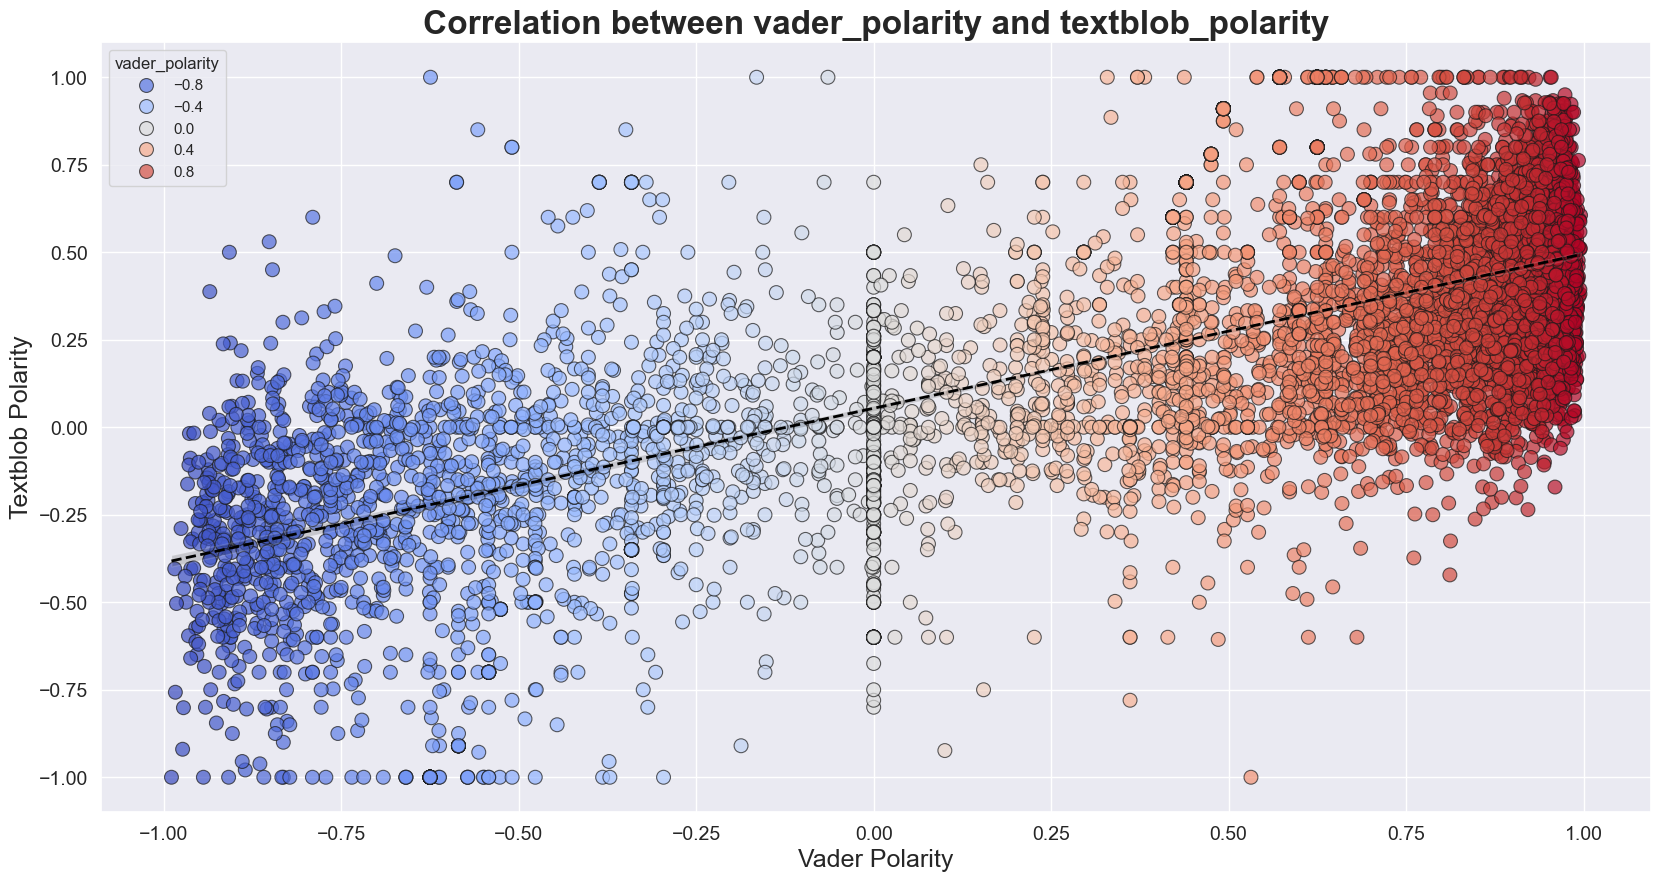

In [18]:
plotter_2(main_sentiment, "vader_polarity", "textblob_polarity")

The scatter plot shows a positive correlation between VADER and TextBlob polarity, with both tools aligning more closely for positive sentiment. Overall, as VADER polarity increases, TextBlob polarity tends to increase as well.

In [19]:
# Normalized values for ratings and sentiment polarity scores 
main_sentiment["normalized_rating"] = normalized_rating.reshape(-1)
main_sentiment["normalized_polarity_vader"] = normalized_polarity_vader.reshape(-1)
main_sentiment["normalized_polarity_textblob"] = normalized_polarity_TextBlob.reshape(-1)
main_sentiment["normalized_mean_sentence_polarity_vader"] = normalized_mean_sentence_polarity_vader.reshape(-1)
main_sentiment["normalized_mean_sentence_polarity_texblob"] = normalized_mean_sentence_polarity_TextBlob.reshape(-1)

main_sentiment.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9193.0,3.607310,1.496929,1.0000,3.000000,4.000000,5.000000,5.0000
NºWords,9193.0,37.174372,28.245931,0.0000,22.000000,32.000000,49.000000,189.0000
vader_polarity,9193.0,0.453947,0.581930,-0.9892,0.000000,0.719000,0.925800,0.9958
mean_sentence_polarity_vader,9193.0,0.279056,0.383908,-0.9721,0.000000,0.333920,0.521167,0.9950
textblob_polarity,9193.0,0.254415,0.376288,-1.0000,0.000000,0.293750,0.528571,1.0000
mean_sentence_polarity_textblob,9193.0,0.232180,0.347706,-1.0000,0.000000,0.250000,0.475000,1.0000
normalized_rating,9193.0,0.651827,0.374232,0.0000,0.500000,0.750000,1.000000,1.0000
normalized_polarity_vader,9193.0,0.727026,0.293164,0.0000,0.498338,0.860554,0.964736,1.0000
normalized_polarity_textblob,9193.0,0.627207,0.188144,0.0000,0.500000,0.646875,0.764286,1.0000
normalized_mean_sentence_polarity_vader,9193.0,0.636041,0.195165,0.0000,0.494179,0.663932,0.759121,1.0000


This table summarizes statistics for sentiment-related variables and their normalized versions across 9,193 observations. The "Rating" column has an average of 3.6 on a scale of 1 to 5. "vader_polarity" has a higher mean (0.45) compared to "textblob_polarity" (0.25), indicating stronger positive sentiment scores for VADER. Sentence-level polarity values are slightly lower for both tools. The normalized versions of the variables are scaled between 0 and 1, with "normalized_rating" averaging 0.65. "normalized_polarity_vader" has higher values (0.727) compared to "normalized_polarity_textblob" (0.627), suggesting that VADER tends to assign stronger sentiment scores overall.

- In the normalized rating, 0.2 corresponds to 1 star of rating. The mean difference between "normalized_rating" and "normalized_polarity_vader" is around 0.07, meaning that the VADER polarity score, on average, has an error of nearly half a star in rating, which is quite good.

- Surprisingly, "normalized_TextBlob" has a mean that is only 0.025 away from the normalized rating, which is about 1/4 of a rating star.

- For "normalized_mean_sentence_polarity_vader," the mean difference from the rating is only 0.015, which is almost negligible. However, the "normalized_rating" has a standard deviation of 0.37, which is considerable. Therefore, these values are not as meaningful as they could be.

<font color='#BFD72F' size=6>3.1 Vader Evaluation</font> <a class="anchor" id="p3-1"></a>

[Back to TOC](#toc)

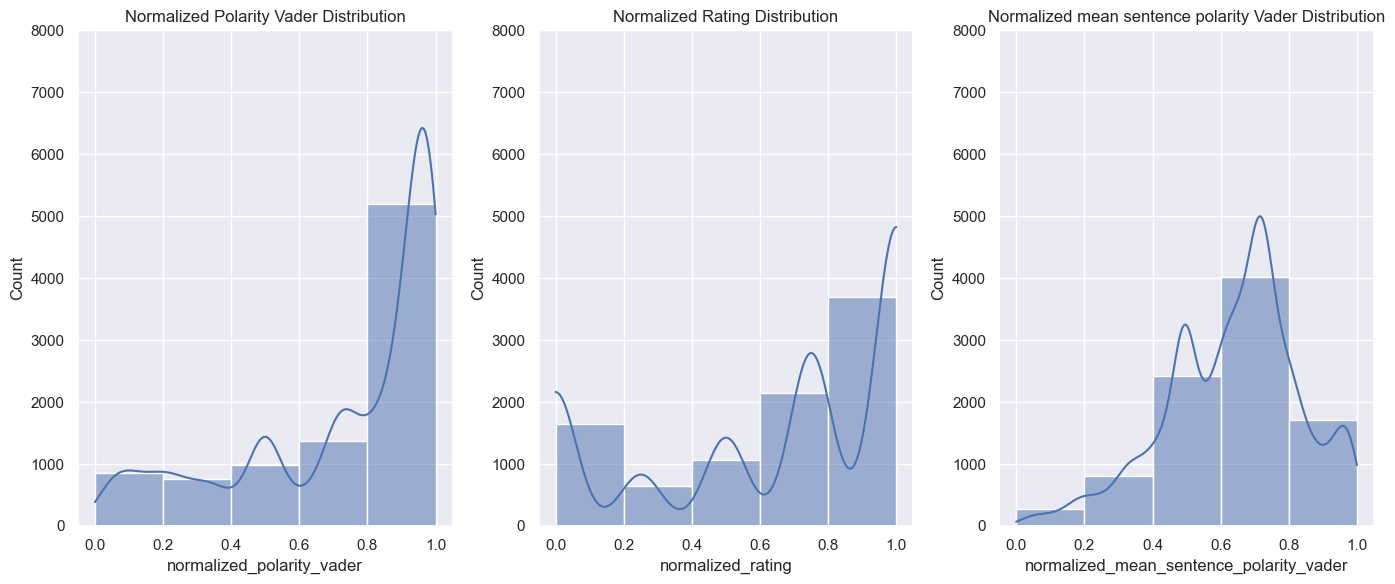

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Plot normalized VADER polarity distribution
sns.histplot(main_sentiment["normalized_polarity_vader"], kde=True, bins=5, ax=axes[0])
axes[0].set_ylim(0, 8000)
axes[0].set_title('Normalized Polarity Vader Distribution')

# Plot normalized rating distribution
sns.histplot(main_sentiment["normalized_rating"], kde=True, bins=5, ax=axes[1])
axes[1].set_ylim(0, 8000)
axes[1].set_title('Normalized Rating Distribution')

# Plot normalized mean sentence polarity (VADER) distribution
sns.histplot(main_sentiment["normalized_mean_sentence_polarity_vader"], kde=True, bins=5, ax=axes[2])
axes[2].set_ylim(0, 8000)
axes[2].set_title('Normalized mean sentence polarity Vader Distribution')

plt.tight_layout()
plt.show()

In the first graph, "Normalized Polarity VADER Distribution," the values are heavily skewed toward the upper range (close to 1.0). This indicates that the majority of the VADER polarity scores are highly positive after normalization, with fewer occurrences of low or neutral polarity values.

The second graph, "Normalized Rating Distribution," shows that the normalized ratings are also skewed toward higher values, with a large concentration near 1.0. This suggests that most ratings are high, and there are fewer lower scores in the dataset.

The third graph, "Normalized Mean Sentence Polarity VADER Distribution," has a slightly more spread-out distribution compared to the first graph, but it still shows a concentration in the higher range (0.6–0.8). This suggests that while sentence-level VADER polarity scores vary more, they remain predominantly positive.

From these normalized distributions, we can observe that VADER tends to classify reviews as 5-star ratings much more frequently than they actually are. However, it seems to classify the 2- and 3-star ratings relatively well, as their distributions are quite close to the actual ratings, despite these categories having fewer reviews.

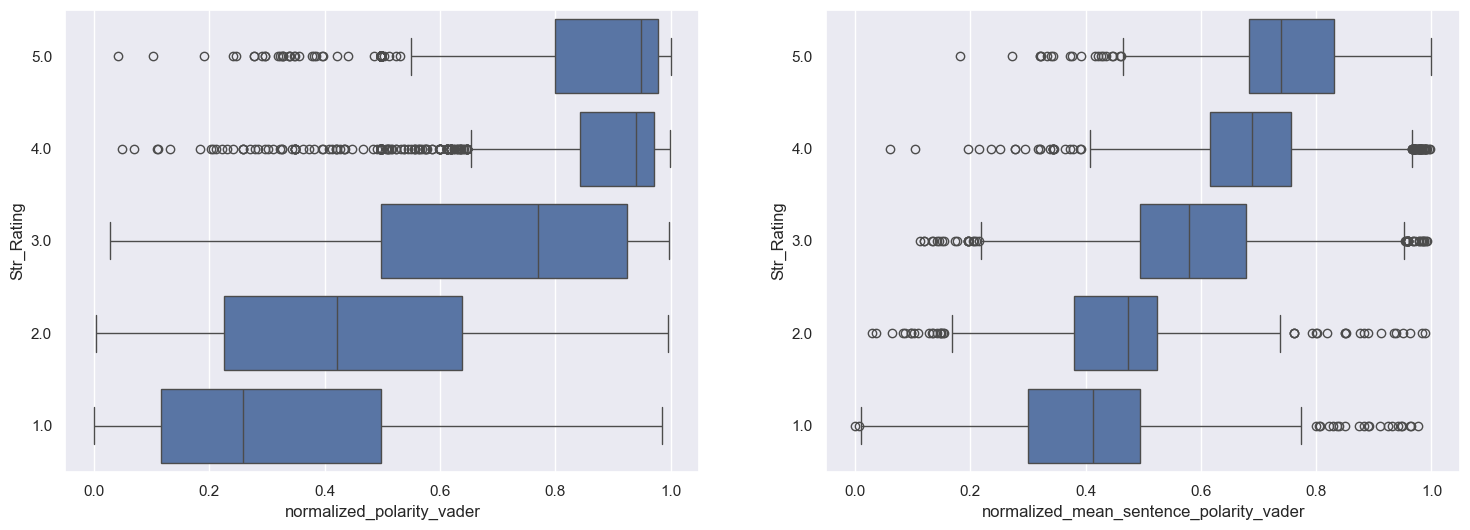

In [21]:
# Convert "Rating" to string for use in the plots
main_sentiment["Str_Rating"] = main_sentiment["Rating"].apply(lambda score : str(score))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Box plot for normalized VADER polarity vs. ratings
sns.boxplot(data=main_sentiment, x="normalized_polarity_vader", y="Str_Rating", order=["5.0", "4.0", "3.0", "2.0", "1.0"], ax = axes[0])

# Box plot for normalized mean sentence polarity (VADER) vs. ratings
sns.boxplot(data=main_sentiment, x="normalized_mean_sentence_polarity_vader", y="Str_Rating", order=["5.0", "4.0", "3.0", "2.0", "1.0"], ax = axes[1])

plt.show()

**Normalized Polarity VADER:**

- **Rating of 1:** The median is close to 0.2, which is accurate, but the box is very wide, and the whiskers are very long, indicating high variability in the predictions.

- **Rating of 2:** The median is close to 0.4, which is also accurate. However, the box is more spread out, and the whiskers are longer, suggesting an even higher variability in the predictions.

- **Rating of 3:** The median is very close to 0.8, indicating that 3-star ratings are being predicted closer to 4-star ratings. Similar to the 1- and 2-star ratings, the box is very wide, and the range is large, suggesting a significant number of outliers.

- **Ratings of 4 and 5:** These two categories have similar medians, around 0.9. The boxes are much more compact, and the range is narrower. While there are some visible outliers, they aren't significant enough to affect the box substantially.

Overall, the distributions for 1-, 2-, and 3-star ratings are more spread out, while 5-star ratings, as we have seen before, are the most frequent predictions made by VADER.

**Normalized Mean Sentence Polarity VADER:**

- **Rating of 1:** The median is high, around 0.4, instead of 0.2 as expected, and the presence of extreme outliers exacerbates the spread. The whisker length indicates that the scores for 1-star reviews overlap significantly with other ratings.

- **Rating of 2:** The median falls near 0.45, with a narrow box and shorter whiskers compared to the other categories. However, there are still many outliers.

- **Rating of 3:** The median is closer to 0.6, with substantial spread and many extreme outliers. The inconsistency in this range shows a stronger tendency to misclassify or overly centralize sentiment scores, which causes significant overlap with higher ratings.

- **Ratings of 4 and 5:** The median for these categories is lower than expected, both under 0.8 when they should be higher. The distribution indicates wider variation and frequent outliers, even for high ratings.

Overall, these distributions have narrower boxes and whiskers compared to the Normalized Polarity VADER, but they contain more severe outliers.

Ratings of 1 with great polarity scores

In [22]:
print(main_sentiment.query("Rating == 1").sort_values("normalized_polarity_vader", ascending = False)["Review"].values[0])

Place located just opposite of DLF gate no 3, which is very much easy to reach. Just reached this place to explore some of their expertise dishes and found lost !
Food quality and staff slowness made me horrible.
Seems they have done some renovation recently, which give something new and good feeling. But to be honest, in a restaurant people visit for good food followed by service. And if this is not maintained then there is no meaning ..!
All the best guys and please do some deep thinking and improve the food quality and service part.


In [23]:
print(main_sentiment.query("Rating == 1").sort_values("normalized_polarity_vader", ascending = False)["Review"].values[1])

The contact number in the true caller shows best cheaters in the world... Good
I had ordered for mutton biryani nd I got noodles which are ugly... Wow I am so happy for that
Good keep it up(bullshit)
How careless they are for delivering this type of service to customer who orders for food
This is really disgusting and bullshit
I suggest everyone not to order any food from this restaurant(Shah ghouse gachibowli)
Better remove service from zomato
Many of our friends had many issues from this restaurant, like delivering different food from ordered food, and delivering one shawarma instead of two and others
Zomato authority should take of all these problems which are spoiling the name and fame


From the samples observed, VADER does not seem to be very effective at analyzing negative reviews, often classifying them as positive. This is likely because the reviews are too long for the sentiment analysis model to process accurately.

Ratings of 5 with bad polarity scores

In [24]:
print(main_sentiment.query("Rating == 5").sort_values("normalized_polarity_vader")["Review"].values[0])

Used to hear that this was probably the best place to have haleem in the city. To my dismay I ordered their renowned haleem last night at about 12PM. Tastewise it seemed average but as I was hungry I finished it fast. Fell asleep at 2AM to wake up at 5AM with a severe upset stomach. This went on and when I woke up by 10AM my stomach still hurt. I'm pretty sure it was some form of mild food poisoning maybe due to hygiene  standards. Nonetheless if they keep this up they'll gradually lose their clientele. Would recommend a place called Cafe 555. Their haleem is far tastier and doesn't come with the complimentary food poisoning.


In [25]:
print(main_sentiment.query("Rating == 5").sort_values("normalized_polarity_vader")["Review"].values[1])

I was so glad when we shifted to our new house because it was so close to this place! This is our favourite breakfast place on a lazy day especially when we are hungover. The Eggs Benedict with salmon is my favourite. Our visit to cafe Eclat is never complete without eating the amazing french toast! Do try it and you would cherish every single bite! I hardly have pictures because as soon as the food arrives we just attack! The one I have attached was taken to make my sister jealous :)


In [26]:
print(main_sentiment.query("Rating == 5").sort_values("normalized_polarity_vader")["Review"].values[3])

I wanna give 10 but I can't . I simply love it . If i Wana spend time with the family the first restaurant come to my mind is this because the retro songs and the old recipes they have make it a best combo ... I simply love it .


In the first example, Vader correctly assigned a 5 star rating as bad, but on others it went completely wrong.

<font color='#BFD72F' size=6>3.2 TextBlob Evaluation</font> <a class="anchor" id="p3-2"></a>

[Back to TOC](#toc)

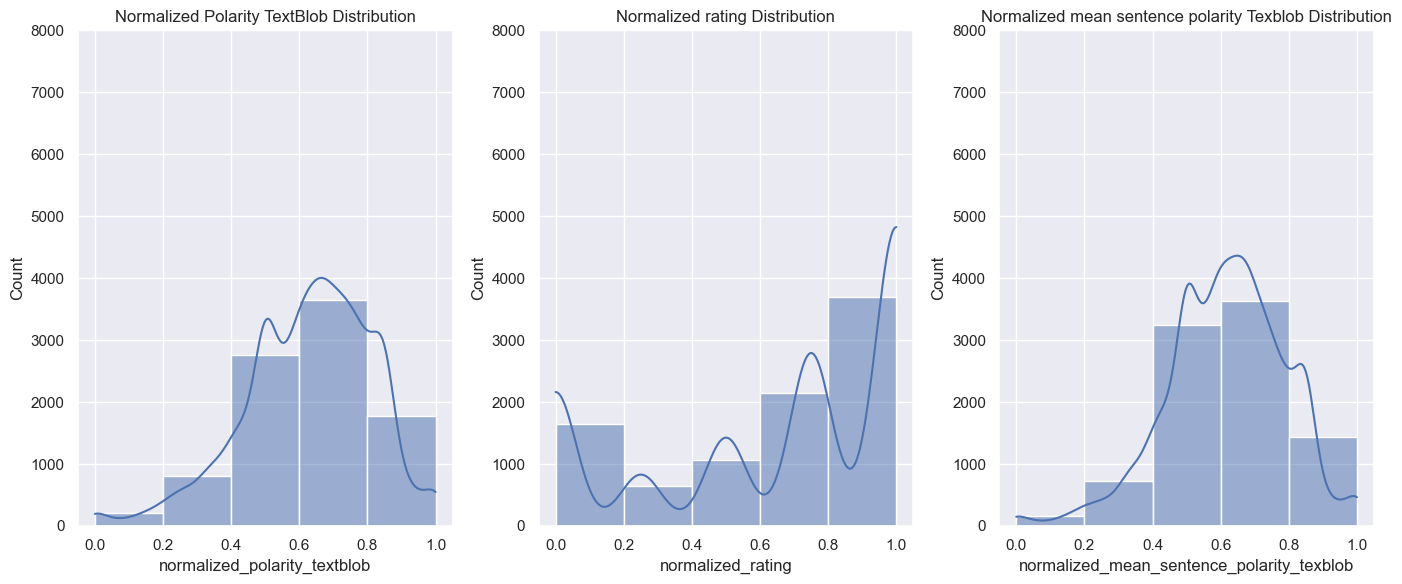

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Plot normalized TextBlob polarity distribution
sns.histplot(main_sentiment["normalized_polarity_textblob"], kde=True, bins=5, ax=axes[0])
axes[0].set_ylim(0, 8000)
axes[0].set_title('Normalized Polarity TextBlob Distribution')

# Plot normalized rating distribution
sns.histplot(main_sentiment["normalized_rating"], kde=True, bins=5, ax=axes[1])
axes[1].set_ylim(0, 8000)
axes[1].set_title('Normalized rating Distribution')

# Plot normalized mean sentence polarity (TextBlob) distribution
sns.histplot(main_sentiment["normalized_mean_sentence_polarity_texblob"], kde=True, bins=5, ax=axes[2])
axes[2].set_ylim(0, 8000)
axes[2].set_title('Normalized mean sentence polarity Texblob Distribution')

plt.tight_layout()
plt.show()

The first graph, Normalized Polarity TextBlob Distribution, shows that normalized polarity values are concentrated between 0.4 and 0.8, with the highest frequency near 0.6. This suggests that most polarity scores, as calculated by TextBlob, indicate moderately positive sentiment, with fewer scores reflecting neutral or very positive sentiments.

The second graph, Normalized Rating Distribution, is the same graph used previously with VADER for comparison purposes.

The third graph, Normalized Mean Sentence Polarity TextBlob Distribution, has a distribution similar to the first, with most values falling between 0.4 and 0.8 and peaking around 0.6. This indicates that the average sentence-level polarity scores reflect generally positive sentiment, with slight variation, suggesting a mix of neutral to positive individual sentence polarities.

TextBlob has a much more centered distribution, with very low variation, as indicated by the low standard deviation. This is likely due to its difficulty in handling informal text, which results in a generally neutral polarity score with a slight bias toward the positive side.

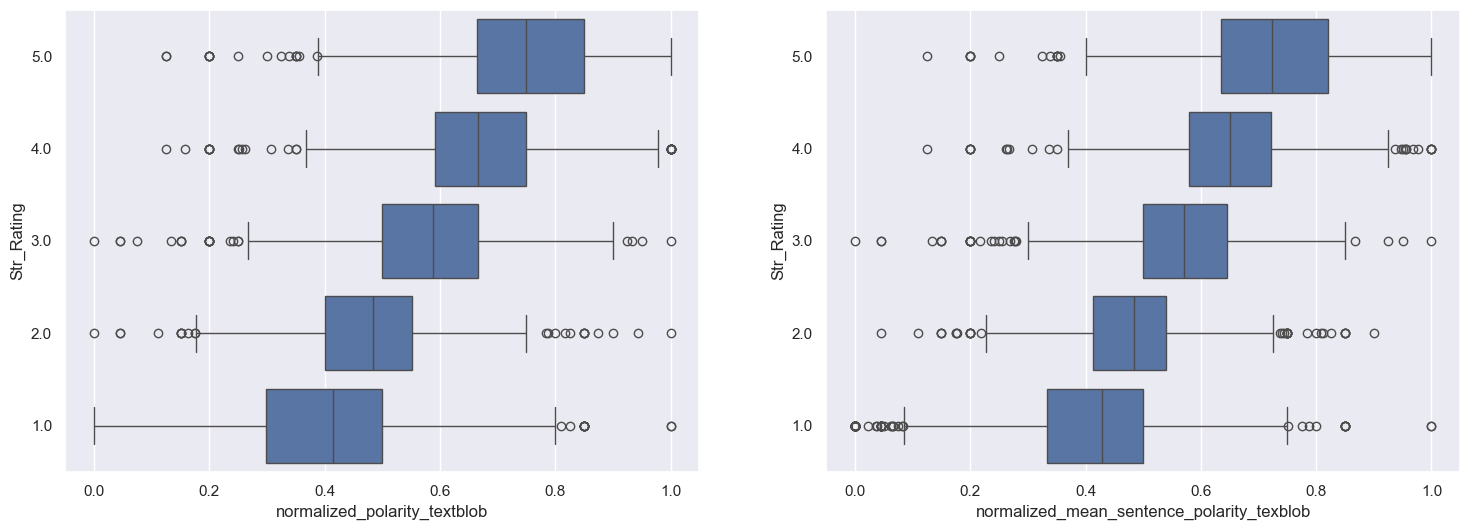

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Box plot for normalized TextBlob polarity vs. ratings
sns.boxplot(data=main_sentiment, x="normalized_polarity_textblob", y="Str_Rating", order=["5.0", "4.0", "3.0", "2.0", "1.0"], ax= axes[0])

# Box plot for normalized mean sentence TextBlob polarity vs. ratings
sns.boxplot(data=main_sentiment, x="normalized_mean_sentence_polarity_texblob", y="Str_Rating", order=["5.0", "4.0", "3.0", "2.0", "1.0"], ax = axes[1])

plt.show()

**Normalized Polarity TextBlob:**

- **Rating of 1:** The median for this category is near 0.4. The box is notably wide, and the whiskers are long, indicating a highly spread distribution of normalized polarity scores. The presence of outliers confirms inconsistent predictions, with some scores falling into ranges more aligned with higher ratings.

- **Rating of 2:** The median is close to 0.5, somewhat aligning with expected results for this rating. However, like the 1-star category, the wide box reflects significant variability in predictions. Frequent outliers show that some scores overlap with the upper rating categories.

- **Rating of 3:** The median is around 0.6, signifying a skew toward higher polarity scores. The box plot displays a wide spread, with considerable overlap into the 4-star range. The presence of outliers highlights inconsistencies, similar to the lower rating categories.

- **Ratings of 4 and 5:** Both ratings have medians around 0.65–0.75, which is lower than expected for both categories. These ratings show a similar distribution to the lower ratings, but with less severe outliers.

Overall, while TextBlob's performance for lower ratings (1, 2, and 3 stars) exhibits wide variability and frequent outliers, its predictive capability for 4- and 5-star ratings is poor.

**Normalized Mean Sentence Polarity TextBlob:**

In general, the distributions are very similar to the previous ones, but with more severe outliers, which makes the performance worse overall.

Ratings of 1 with great polarity scores

In [29]:
print(main_sentiment.query("Rating == 1").sort_values("normalized_polarity_textblob", ascending = False)["Review"].values[0])

Excellent food but why am I always given plastic cutlery even though I specifically request it NOT be provided?


In [30]:
print(main_sentiment.query("Rating == 1").sort_values("normalized_polarity_textblob", ascending = False)["Review"].values[1])

food is awesome, but delivered food after 1:30 hours late.when called and asked they replied, there are lot of orders.this is not fare.we waited almost 90mins for 20mins delivery


In [31]:
print(main_sentiment.query("Rating == 1").sort_values("normalized_polarity_textblob", ascending = False)["Review"].values[2])

good


All these reviews started with positive words but were followed by numerous complaints. TextBlob failed to evaluate these reviews accurately.

Ratings of 5 with bad polarity scores

In [32]:
print(main_sentiment.query("Rating == 5").sort_values("normalized_polarity_textblob")["Review"].values[0])

Some restaurant's have figured their identity. This is one of them. Bamboo rice and honey glazed chicken all day! Ask for the blueberry cheesecake and indulge yourself.


In [33]:
print(main_sentiment.query("Rating == 5").sort_values("normalized_polarity_textblob")["Review"].values[1])

Just because of a silly reason your customer care executives are talking about rules and ruthlessly saying customer has to bear the costs for uber mistake.


In [34]:
print(main_sentiment.query("Rating == 5").sort_values("normalized_polarity_textblob")["Review"].values[2])

felt like having home made chicken


Out of these three examples, one was correctly classified as a bad review.

<font color='#BFD72F' size=7>4. Conclusion</font> <a class="anchor" id="p4"></a>

[Back to TOC](#toc)

In this analysis, VADER and TextBlob were used to evaluate sentiment in user reviews and their alignment with ratings. VADER outperformed TextBlob, showing a stronger correlation with normalized ratings (0.7178 vs. 0.7016) and sentence-level scores (0.704 vs. 0.685). Error metrics for VADER, including an RMSE of 0.272 and MAPE of 14.4%, indicate a moderate deviation from the actual ratings. Overall, we can conclude that VADER tended to predict reviews as positive more often than as negative.